<a href="https://colab.research.google.com/github/byslavam/MAT422/blob/main/3_7_Nueral_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.7 Nueral Networks**
Artificial neural networks is a collection of connected layers of units or nodes
to loosely model the neurons in a biological brain.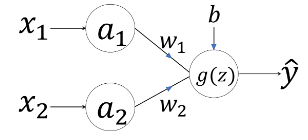


*   $x_1$ and $x_2$ are inputs from the left, and a forecast output on the right, $ŷ$, which is modified by the activation function $**σ**(z)$ chosen in advance: $ŷ = σ(z)=σ(w_1a_1+w_2a_2+b)$
*   In the nueral networks, the wieights, the $w_i$, and bias, $b$, will be found numerically to best fit our forecast output with our given data.

## **Nueral Network Overview**

* The input layer receives the input data
* The hidden layers transform the input data into the output data.
* The output layer produces the output data.
* The weights and biases are updated using the backpropagation algorithm.
* The loss function is used to measure the performance of the model.
* The loss function is minimized using the gradient descent algorithm.
* The model is tuned using the hyperparameters.

## **Nueron (Preceptron)**
A Neural Network consists of Neurons, which are the basic building blocks of a neural network. A Neuron is a single node in a neural network. A Neuron is defined as:

$y_k = \phi(Σ_{i=1}^{n}w_{ki}x_i+b_k)$

where:
* $y_k$ is the output of the $k$-th perceptron.
* $x_i$ is the input of the $i$-th perceptron.
* $w_{ki}$ is the weight of the $k$-th perceptron.
* $b_k$ is the bias of the $k$-th perceptron.
* $ϕ$ is the activation or the transfer function

## **Activation Function**
The activation function for a neuron is used to transform the input data into the output data. The activation function is defined as:

$u=Σ_{i=1}^{n}w_ix_i+b$

$y=ϕ(u)$

where:
* $u$ is the weighted sum of the inputs.
* $y$ is the output of the neuron.
* $x_i$ is the input of the $i$-th neuron.
* $w_i$ is the weight of the $i$-th neuron.
* $b$ is the bias of the neuron.

### **Step Function**
The step function is a simple activation function that returns 1 if the input is greater than 0, otherwise it returns 0.

$y =
\begin{cases}
1 & \text{if }  u>0 \\
0 &\text{otherwise}
\end{cases}$


### **ReLU Function**
ReLU stands for Rectified Linear Unit. It is one of the most popular activation functions. ReLU performs a linear transformation of the input data.

$y =
\begin{cases}
u & \text{if }  u>0 \\
0 &\text{otherwise}
\end{cases}$

### **Sigmoid Function**
The sigmoid function is a smooth activation function that returns a value between 0 and 1.

$y=\frac{1}{1+e^{-u}}$

### **Softmax Function**
The softmax function is a smooth activation function that returns a probability distribution. It is often used in the final output layer, especially with classification problems.

$y_k = \frac{e^{u_k}}{Σ_{i=1}^{n}e^{u_i}}$


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1477 - accuracy: 0.9564
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0512 - accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0323 - accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0213 - accuracy: 0.9933
Epoch 5/5
1/1 [==============================] - 0s 102ms/step


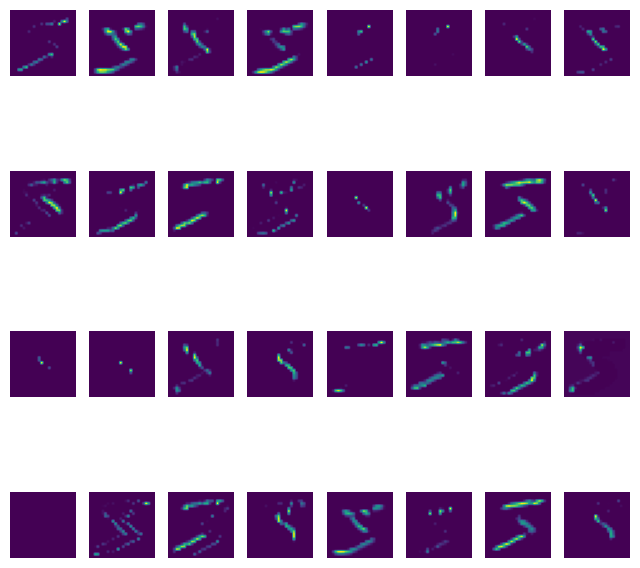

In [1]:
# Demo
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load a dataset (e.g., the MNIST dataset)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple convolutional neural network
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Choose a specific image for visualization
image_index = 0

# Get activation maps for a given layer (e.g., the first convolutional layer)
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[image_index].reshape(1, 28, 28, 1))

# Plot activation maps
for layer_name, layer_activation in zip([layer.name for layer in model.layers], activations):
    if 'conv2d' in layer_name:
        plt.figure(figsize=(8, 8))
        for i in range(32):  # Choose the number of filters to display
            plt.subplot(4, 8, i + 1)
            plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.show()
